In [99]:
import pandas as pd
import numpy as np
import datetime as dt
from Viz.Utils import get_data_for_multiple_stocks, get_df_by_metric

holdings = pd.read_csv(r"C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\ETIHX_holdings_20191127.csv")
holdings.head()

,title,name,ticker,market cap ($B),value_usd,pct_portfolio,payoff_profile
0,EXACT SCIENCES CORP,EXACT SCIENCES CORPORATION,EXAS,13.65,19881400.0,2.237275,Long
1,ARGENX SE - ADR,Argenx SE,ARGX,6.88,26210800.0,2.949529,Long
2,SAREPTA THERAPEUTICS INC,Sarepta Therapeutics Inc,SRPT,9.70,37584680.0,4.229444,Long
3,GALAPAGOS NV-SPON ADR,Galapagos Nv,GLPG,13.51,26410180.0,2.971966,Long
4,NEUROCRINE BIOSCIENCES IN,Neurocrine Biosciences Inc,NBIX,9.92,31808830.0,3.579482,Long


In [100]:
# ETIHX
import pickle
from pathlib import Path

preload = True
ETIHX_path = Path(r"C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\ETIHX_assets (2).pickle")
tickers = holdings['ticker'][:31]

In [101]:
if preload:
    # load the pickle file
    with open(ETIHX_path, 'rb') as handle1:
        data_dict = pickle.load(handle1)

else:
    data_dict = get_data_for_multiple_stocks(tickers, dt.date(2019, 1, 1), dt.date(2019, 12, 31))

    data_dict.pop("KRTX")
    # else dump the pickle files
    with open(ETIHX_path, 'wb') as handle1:
        pickle.dump(data_dict, handle1)

One of ETIHX's top 30 holdings is a privately listed company. ETIHX also holds KRTX, which was only listed in July 2019.  
We take the top 32 holdings instead. 

In [102]:
# add RAFA
RAFA = get_data_for_multiple_stocks(['RAFA'], dt.date(2019, 1, 1), dt.date(2019, 12, 31))['RAFA']
data_dict["RAFA"] = RAFA

len(data_dict.keys())

0/1


28

In [103]:
# check all processed
[t for t in tickers.values if t not in list(data_dict.keys())]

['BOLD', 'KRTX', 'STML']

In [104]:
# get log returns
col_wanted = 'log_return'
log_returns_df = pd.DataFrame()
for k,v in data_dict.items():
    log_returns_df[k] = v[col_wanted]

log_returns_df.dropna(inplace=True)
log_returns_df.head()

,EXAS,ARGX,SRPT,GLPG,NBIX,ASND,MRTX,MYOK,MNTA,BPMC,...,QURE,MYOV,RCKT,ZGNX,COLL,CRNX,AVRO,XENE,MGTA,RAFA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.016347,0.028526,-0.015049,-0.013498,-0.018658,0.034359,0.051234,-0.152481,0.023278,-0.051967,...,-0.010113,0.031196,0.018717,0.045310,0.036035,-0.022935,-0.061939,0.056982,0.051293,0.0
2019-01-03,-0.034256,0.021220,-0.007751,-0.009993,-0.011191,-0.042372,-0.022651,-0.033450,-0.058304,-0.049670,...,-0.040778,-0.005924,-0.003981,0.000000,-0.001687,-0.011668,0.022118,-0.044384,-0.040822,0.0
2019-01-04,0.057526,0.048616,0.078924,0.083770,0.075025,0.038973,0.030237,0.042467,-0.017984,0.093629,...,0.027014,0.013574,0.028189,0.075212,0.052081,0.008935,0.044017,0.072430,0.063887,0.0
2019-01-07,0.137939,0.032942,-0.048002,0.032015,0.091397,0.045971,0.070577,0.002124,0.075403,0.132222,...,0.047537,-0.004112,0.030556,0.049797,-0.217550,-0.074924,-0.057862,0.091731,-0.074359,0.0
2019-01-08,0.010560,0.027993,0.008327,0.027643,0.030794,0.047339,0.052649,0.034522,-0.008004,0.023957,...,-0.025048,0.034706,0.004379,0.026254,-0.017415,-0.029563,-0.190722,0.094948,0.008734,0.0


In [105]:
# get adj close
col_wanted = 'Adj Close'
adj_close_df = pd.DataFrame()
for k,v in data_dict.items():
    adj_close_df[k] = v[col_wanted]

adj_close_df.dropna(inplace=True)
adj_close_df.head()

,EXAS,ARGX,SRPT,GLPG,NBIX,ASND,MRTX,MYOK,MNTA,BPMC,...,QURE,MYOV,RCKT,ZGNX,COLL,CRNX,AVRO,XENE,MGTA,RAFA
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,63.099998,96.070000,109.129997,91.739998,71.410004,62.650002,42.419998,48.860001,11.04,53.910000,...,28.820000,16.410000,14.82,36.459999,17.170000,29.990000,16.650000,6.31,5.70,0.01
2019-01-02,64.139999,98.849998,107.500000,90.510002,70.089996,64.839996,44.650002,41.950001,11.30,51.180000,...,28.530001,16.930000,15.10,38.150002,17.799999,29.309999,15.650000,6.68,6.00,0.01
2019-01-03,61.980000,100.970001,106.669998,89.610001,69.309998,62.150002,43.650002,40.570000,10.66,48.700001,...,27.389999,16.830000,15.04,38.150002,17.770000,28.969999,16.000000,6.39,5.76,0.01
2019-01-04,65.650002,106.000000,115.430000,97.440002,74.709999,64.620003,44.990002,42.330002,10.47,53.480000,...,28.139999,17.059999,15.47,41.130001,18.719999,29.230000,16.719999,6.87,6.14,0.01
2019-01-07,75.360001,109.550003,110.019997,100.610001,81.860001,67.660004,48.279999,42.419998,11.29,61.040001,...,29.510000,16.990000,15.95,43.230000,15.060000,27.120001,15.780000,7.53,5.70,0.01


#### Basic EDA

Text(0.5, 1, 'Asset Correlations')

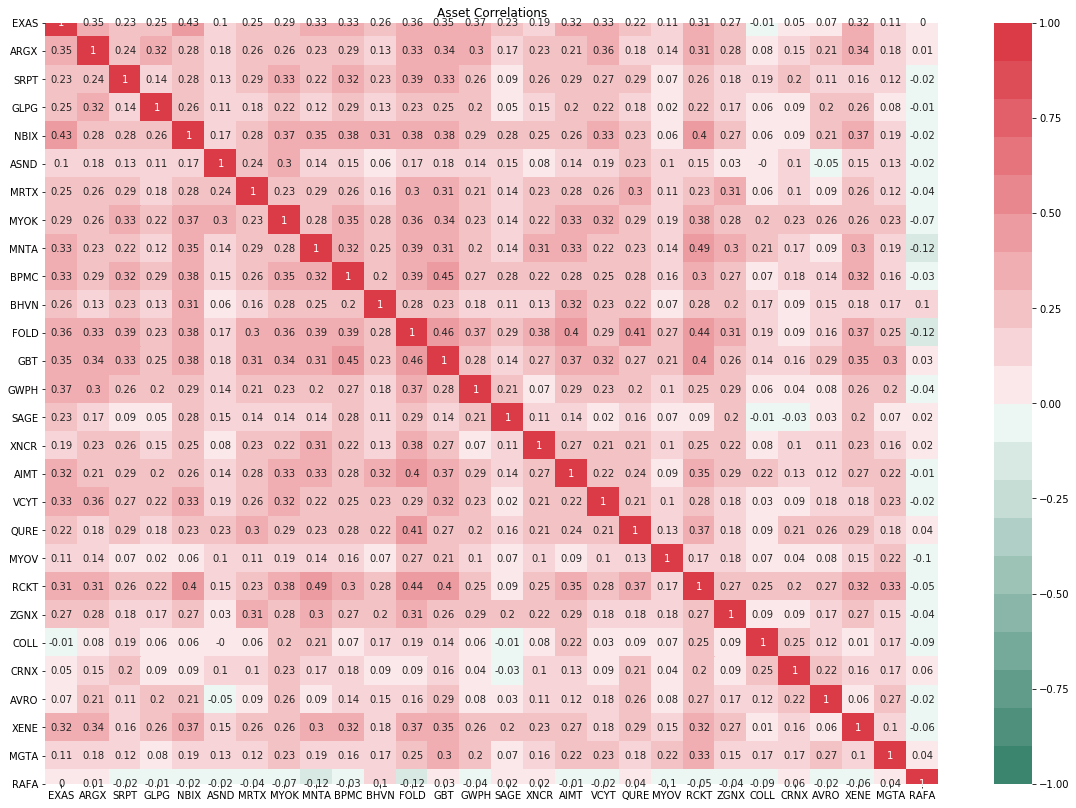

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# corr matrix
plt.figure(figsize=(20, 14))
sns.heatmap(round(log_returns_df.corr(), 2), cmap=sns.diverging_palette(160, 10, n = 20), annot=True, vmin=-1, vmax=1)
plt.title("Asset Correlations")

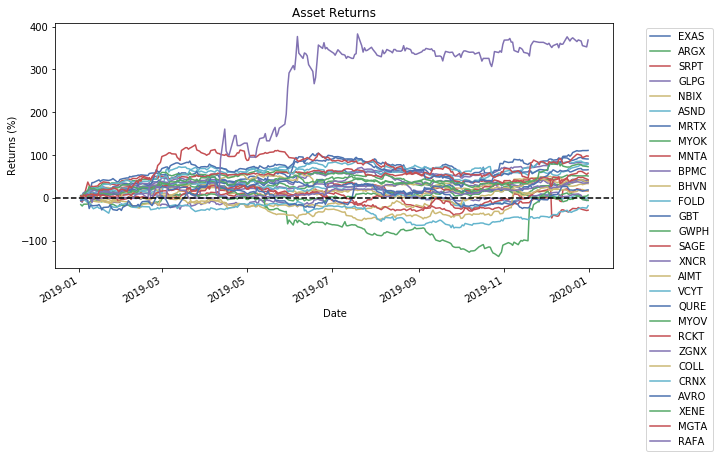

In [107]:
log_returns_df.expanding(0).apply(lambda x: sum(x) * 100, raw = True).plot(figsize = (10, 5))
plt.title("Asset Returns")
plt.ylabel("Returns (%)")
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [108]:
log_returns_df.sum()

EXAS    0.382272
ARGX    0.513341
SRPT    0.167583
GLPG    0.812939
NBIX    0.408960
ASND    0.797773
MRTX    1.111107
MYOK    0.399924
MNTA    0.580615
BPMC    0.396085
BHVN    0.386722
FOLD    0.016564
GBT     0.660840
GWPH    0.071038
SAGE   -0.282857
XNCR   -0.050188
AIMT    0.335935
VCYT    0.797235
QURE    0.910863
MYOV   -0.055761
RCKT    0.429027
ZGNX    0.357525
COLL    0.181156
CRNX   -0.178395
AVRO    0.189801
XENE    0.731240
MGTA    0.978194
RAFA    3.686376
dtype: float64

Historical returns for these stocks are very high (more than 300% returns!)

Need to adjust to make it reasonable and fit the optimization.

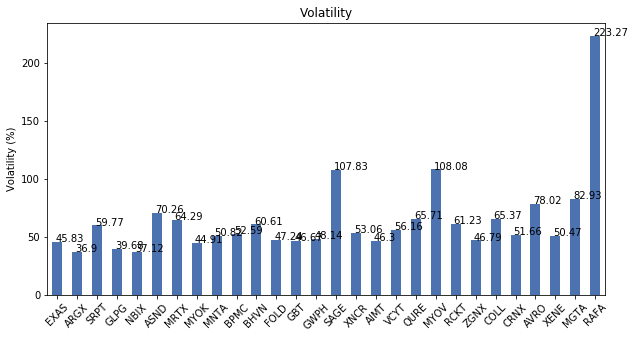

In [109]:
# vol
ax = round(log_returns_df.std() * 260 ** 0.5 * 100, 2).plot(figsize = (10, 5), kind = "bar")
plt.title("Volatility")
plt.ylabel("Volatility (%)")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.1))

Volatility for some of these firms are also too large.

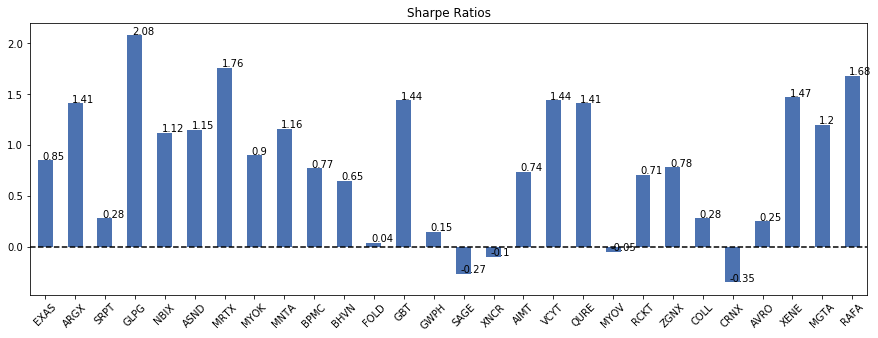

In [110]:
# sharpe ratio
ax = round(log_returns_df.mean(axis = 0) / log_returns_df.std(axis = 0) * 252 ** 0.5, 
           2).plot(kind="bar", figsize = (15, 5))

plt.title("Sharpe Ratios")
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.01))


### BL Model


1. obtain analyst target prices as of end of 2019
2. using close price on 31/12/2019, calculate the expected returns for 2020. these will be the 'views' into the BL model. 


https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/4-Black-Litterman-Allocation.ipynb
https://faculty.fuqua.duke.edu/~charvey/Teaching/BA453_2006/Idzorek_onBL.pdf   
https://www.stat.berkeley.edu/~nolan/vigre/reports/Black-Litterman.pdf

In [111]:
# data prep for next step
# fund weights
fund_weights = holdings['pct_portfolio']
fund_weights.index = holdings['ticker']
fund_weights.drop(labels=[x for x in fund_weights.index if x not in log_returns_df.columns], inplace=True)
fund_weights.reindex(list(log_returns_df.columns))
fund_weights = fund_weights.divide(sum(fund_weights))  # normalize weights


# market cap 
market_cap = holdings['market cap ($B)']
market_cap.index = holdings['ticker']
market_cap.drop(labels=[x for x in market_cap.index if x not in log_returns_df.columns], inplace=True)
market_cap = market_cap.apply(lambda x: float(x))
market_cap.reindex(list(log_returns_df.columns))
market_cap_weighted = market_cap.divide(sum(market_cap))

#### Priors
The 'default' estimate if we have no additional information.  
Use SPY as the market (US assets) to estimate the excess returns over the market  
(eg. if have no additional information, we should just hold the index) 

In [112]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

rf_rate = 0.0159  # as of end 2019
market_prices = get_data_for_multiple_stocks(['^NBI'], dt.date(2019, 1, 1), dt.date(2019, 12, 31))['^NBI']['Adj Close']
delta = black_litterman.market_implied_risk_aversion(market_prices, risk_free_rate=rf_rate)
print(f'based on the risk-free rate of {rf_rate}, the market price of risk is {delta}')

0/1
based on the risk-free rate of 0.0159, the market price of risk is 5.563663506399384


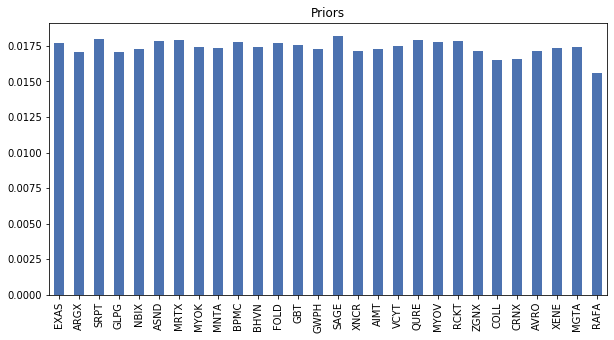

In [113]:
rets = np.exp(log_returns_df.T.to_numpy()) - 1
cov = np.cov(rets)

# pypfopt requires cov matrix to be a pandas DataFrame
cov_df = pd.DataFrame(cov, index=log_returns_df.columns, columns=log_returns_df.columns)

# prior returns based on the market returns and how much each asset contributes to it (i.e market cap weighted)
priors = black_litterman.market_implied_prior_returns(market_cap, delta, cov_df, risk_free_rate=rf_rate)
priors.plot(kind='bar', figsize=(10, 5), title='Priors')

#### Views

Views are our expectations about the future performance of the assets. These can be either absolute (XXX will rise 100%), or relative (ZZZ will outperform XXX by 50%).  

We will just use the target prices as the views.

target prices: https://www.marketscreener.com/quote/stock/EXACT-SCIENCES-CORPORATIO-9232/consensus/

In [114]:
# target prices as of end 2019

EUR_USD = 1.12  # EUR-USD exchange rate as of 12/31/2019

target_prices = {'EXAS': 123.92, 'ARGX': 142.25 * EUR_USD, 'SRPT': 194.04, 'GLPG': 175.91 * EUR_USD,
                 'NBIX': 117.67, 'ASND': 141.95 * EUR_USD, 'MRTX': 114.58, 'MYOK': 83.45, 
                 'BPMC': 104.21, 'BHVN': 77.50, 'FOLD': 18.00,
                 'GBT': 101.94, 'GWPH': 206.07, 'SAGE': 108.63,
                 'XNCR': 45.89, 'AIMT': 46.91, 'VCYT': 34.00, 'QURE': 78.03 * EUR_USD,
                 'MYOV': 26.00, 'RCKT': 36.14, 'ZGNX': 63.42, 'COLL': 26.88,
                 'CRNX': 36.67, 'AVRO': 36.15, 'XENE': 21.75,
                 'MGTA': 20.20, 'MNTA': 24.52}

pred_returns = pd.Series()
for ticker, target_price in target_prices.items():
    end_price = adj_close_df[ticker][-1]
    pred_return = target_price / end_price - 1  # simple returns
    pred_returns.loc[ticker] = pred_return

pred_returns.sort_values(ascending=False)

C:\Users\Timothy Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


GWPH    0.970830
FOLD    0.848049
AVRO    0.795827
MYOV    0.675258
XENE    0.659039
RCKT    0.587873
SAGE    0.504779
SRPT    0.503720
CRNX    0.461538
BHVN    0.423586
AIMT    0.401554
EXAS    0.339965
XNCR    0.334400
MGTA    0.332454
COLL    0.306122
BPMC    0.300836
GBT     0.282425
MNTA    0.242778
QURE    0.219559
VCYT    0.217765
ZGNX    0.216574
MYOK    0.144954
ASND    0.142783
NBIX    0.094707
ARGX   -0.007476
GLPG   -0.047434
MRTX   -0.110818
dtype: float64

In [115]:
# check which do not have views
[s for s in priors.index if s not in target_prices.keys()]

['RAFA']

Most of the predicted returns are quite high.   
The higher the predicted return, the less likely we expect that outcome. We can adjust this by assigning a lower confidence to these views.  


In [116]:
confidences = pd.Series([0.5 if p <= 0.5 else 0.3 for p in pred_returns], index=pred_returns.index)
views = pred_returns.to_dict()

# if omega=None, view uncertainty defaulted to asset variance
bl = BlackLittermanModel(cov_df, pi=priors, absolute_views=views, risk_free_rate=rf_rate,
                         omega='idzorek', view_confidences=confidences)
                        

# posterior estimates for bl returns
post_ret = bl.bl_returns()  
post_ret.sort_values(ascending=False)

MYOV    0.406017
FOLD    0.403252
RCKT    0.385540
GWPH    0.383970
MGTA    0.347456
SAGE    0.337087
SRPT    0.328923
BHVN    0.322420
AIMT    0.315115
AVRO    0.313945
XENE    0.306840
QURE    0.299698
GBT     0.279919
CRNX    0.276239
BPMC    0.272488
EXAS    0.261946
MNTA    0.259164
COLL    0.248219
XNCR    0.246455
MYOK    0.208900
ZGNX    0.208662
VCYT    0.195298
NBIX    0.163330
ASND    0.106265
ARGX    0.105234
MRTX    0.086583
GLPG    0.051578
RAFA   -0.151161
dtype: float64

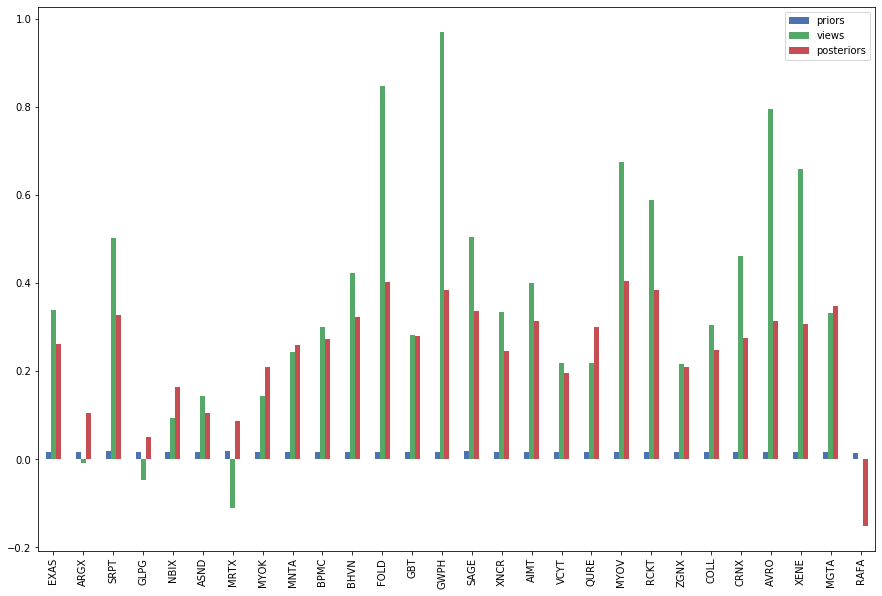

In [117]:
# visualising priors, views and posteriors
bl_df = pd.DataFrame([priors, pred_returns, post_ret]).T
bl_df.columns = ['priors', 'views', 'posteriors']
bl_df.plot(kind='bar', figsize=(15, 10))

In [118]:
import pickle

bl_df_path = Path(r'C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\bl_df.pickle')
with open(bl_df_path, 'wb') as handle:
    pickle.dump(bl_df, handle)

#### Optimizing portfolio

portfolio: Historical returns v volatility 

minimize variance but add some weight to expected returns

are returns and volatility on the same scale?

constraints: 
- long only
- sum weights = 1
- not more than 30% allocated in a single stock (might be a bit too high) 
- expected returns at least equal to benchmark return (or else we should just hold benchmark) 
- 95% VaR not greater than 20% of portfolio value, assuming zero-mean returns and VaR calculated by parametric approach 

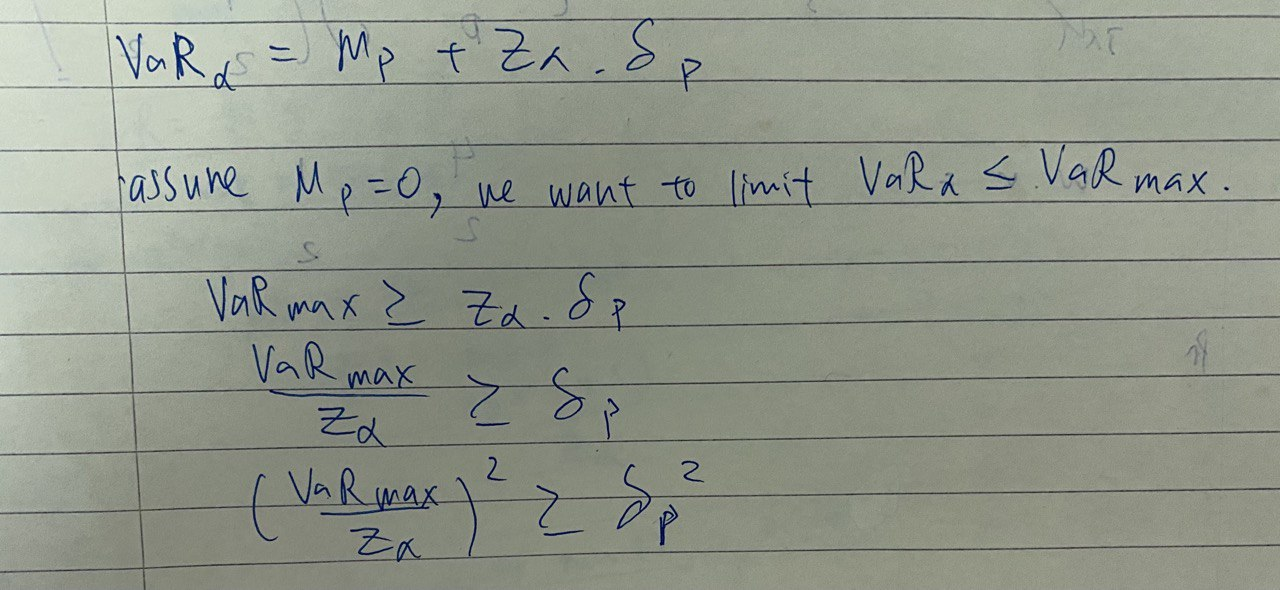

In [119]:
# calculate benchmark return
IBB = get_data_for_multiple_stocks(['IBB'], dt.date(2019, 1, 1), dt.date(2019, 12, 31))['IBB']['Adj Close']

benchmark_ret = IBB[-1] / IBB[0] - 1
benchmark_ret

0/1


0.2521363003339492

Even though our benchmark index is ^NBI, we peg our portfolio performance against the returns from IBB as we are not actually able to directly invest in the ^NBI.

In [120]:
import cvxpy as cvx

# returns series

# convert to simple returns, since our 'views' are calculated as simple returns
returns = np.exp(log_returns_df.T.to_numpy()) - 1

# no. of weights to optimize 
m = returns.shape[0]

# cov matrix
cov = np.cov(returns)

x = cvx.Variable(m)

# get portfolio variance from covariance matrix and candidate weights
portfolio_variance = cvx.quad_form(x, cov)

# total returns for obj func
bl_approach = True
if bl_approach:
    exp_ret = post_ret  # using posterior returns from BL model
else:
    exp_ret = updated_returns  # using SML method

portfolio_total_return = sum(cvx.multiply(exp_ret, x))  # weighted avg of asset returns

#objective function
returns_scale = 0.001
objective = cvx.Minimize(portfolio_variance - returns_scale*portfolio_total_return)

# setting up constraint to limit amt invested by market cap
bin_1 = np.where(market_cap > 10, 1, 0)
bin_2 = np.where((market_cap > 2) & (market_cap <= 10), 1, 0)
bin_3 = np.where((market_cap <= 2), 1, 0)
A = np.asmatrix([bin_1, bin_2, bin_3])
bounds = np.asmatrix([0.1, 0.6, 0.3])
A_mod = A - bounds.T

VaR_max = 0.2
constraints = [x >= 0,
               sum(x) == 1, 
               x <= 0.2,
               A_mod@x.T <= 0,
               portfolio_total_return >= benchmark_ret,  # only accept returns greater than this
               portfolio_variance <= np.power(VaR_max / 1.66, 2)  # only tolerate portfolio variance less than this
              ] 

problem = cvx.Problem(objective, constraints)

result = problem.solve()

# optimised weights
weights = round(pd.Series(x.value, index=log_returns_df.columns), 3)
weights.sort_values(ascending=False)

GWPH    0.184
CRNX    0.145
FOLD    0.104
AIMT    0.082
EXAS    0.066
NBIX    0.057
ZGNX    0.049
BHVN    0.048
XNCR    0.047
COLL    0.042
GLPG    0.034
XENE    0.027
AVRO    0.024
GBT     0.016
MNTA    0.016
ASND    0.016
ARGX    0.014
SRPT    0.013
MYOV    0.009
RAFA    0.006
SAGE    0.002
MGTA    0.000
VCYT    0.000
QURE    0.000
BPMC    0.000
MYOK    0.000
MRTX    0.000
RCKT    0.000
dtype: float64

In [121]:
import pickle 
from pathlib import Path

opt_weights_path = Path(r'C:\Users\Timothy Lim\Dropbox\Tim Y4S1\BT4016\Project\RiskAnalytics\data\optimised_weights.pickle')
with open(opt_weights_path, 'wb') as handle:
    pickle.dump(weights, handle)

In [122]:
# check assigned weights by market cap
holdings.dropna(subset=['market cap ($B)'], inplace=True)
holdings['market_cap_classification'] = holdings['market cap ($B)'].apply(lambda x: 1 if float(x) <= 2
                                                                         else 2 if float(x) <= 10 else 3)


# check weights for market cap
weighted_mcap = holdings.merge(weights.rename("weights"), how='inner', left_on='ticker', right_index=True)
weighted_mcap.groupby(by=['market_cap_classification']).sum()['weights']

market_cap_classification
1    0.300
2    0.601
3    0.100
Name: weights, dtype: float64

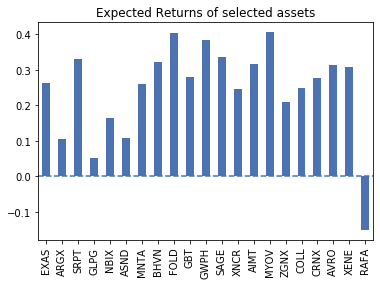

In [123]:
selected = weights[weights > 0].index
exp_ret[selected].plot(kind='bar', title='Expected Returns of selected assets')
plt.axhline(0, linestyle='--')

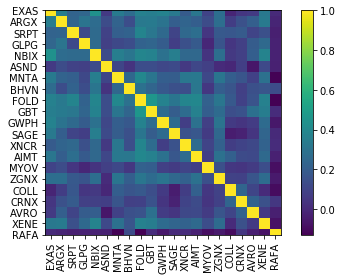

In [124]:
from pypfopt import plotting

plotting.plot_covariance(cov_df.loc[selected, selected], plot_correlation=True)

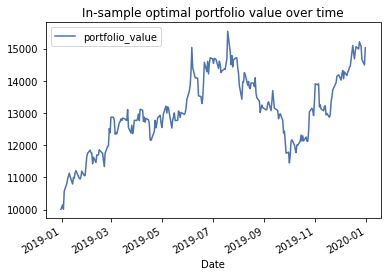

In [125]:
# portfolio value over time
initial_investment = 10000
num_shares = np.divide(weights * initial_investment, adj_close_df.iloc[0])
opt_pf_df = pd.DataFrame(index=adj_close_df.index)
opt_pf_df['portfolio_value'] = np.dot(num_shares, adj_close_df.T)
opt_pf_df.plot(title='In-sample optimal portfolio value over time')

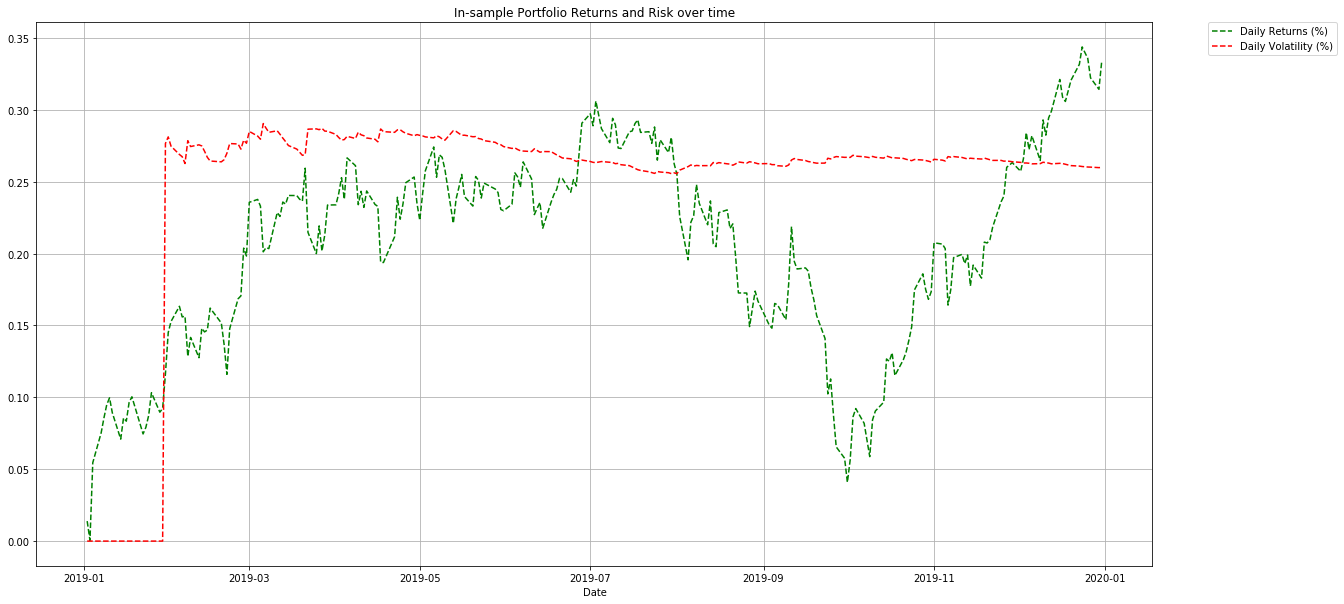

In [126]:
# portfolio return and volatility
pf_returns = np.dot((np.exp(log_returns_df) - 1), weights)
pf_log_returns = pd.Series(np.log(1 + pf_returns))
pf_volatility = pd.Series(pf_log_returns).expanding(20).apply(lambda x: np.sqrt(260) * np.std(x)).fillna(0)

plt.figure(figsize=(20, 10))
plt.plot(log_returns_df.index, pf_log_returns.expanding(0).apply(lambda x: sum(x)), 'g--', label='Daily Returns (%)')
plt.plot(log_returns_df.index, pf_volatility, 'r--', label='Daily Volatility (%)')
plt.grid(True)
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('In-sample Portfolio Returns and Risk over time')

plt.show()

#### Check the optimisation

The in-sample performance of our optimised portfolio doesn't look too good.

We suspect this is due to the way that the returns are adjusted. To check that our optimisation really worked, we check the following: 

1. Using the adjusted returns, calculate the portfolio return based on the weights allocated by our 'best' portfolio. Compare these against the optimised weights.
2. Check the portfolio risk based on the historical returns. Make sure it is within our VaR constraint. 
3. Compare the allocation by market cap weights. Our optimised portfolio may be overweight / underweight in some areas. 

In [127]:
# 1-2. portfolio returns based on adjusted returns, using ETIHX fund weights

assert all(fund_weights.index == exp_ret.index)
returns = np.dot(fund_weights, exp_ret)
variance = np.dot(fund_weights, np.dot(fund_weights, cov))

print(f'ETIHX portfolio returns: {returns}')
print(f'ETIHX portfolio risk: {variance}')

ETIHX portfolio returns: 0.2401963213011077
ETIHX portfolio risk: 0.00031339318954377306


In [128]:
# 1-2. portfolio returns based on adjusted returns, using optimised weights

assert all(weights.index == exp_ret.index)
returns = np.dot(weights, exp_ret)
variance = np.dot(weights, np.dot(weights, cov))

print(f'Optimal portfolio returns: {returns}')
print(f'Optimal portfolio risk: {variance}')

Optimal portfolio returns: 0.28985946785995215
Optimal portfolio risk: 0.0002613697343522266


Based on the adjusted returns, it appears that our optimised portfolio gives slightly beter returns.

Based on the historical returns, our optimised portfolio also has slightly lower risk. 

Interesting to note if we use the fund weights from ETIHX, the portfolio returns would have underperformed the benchmark index. 

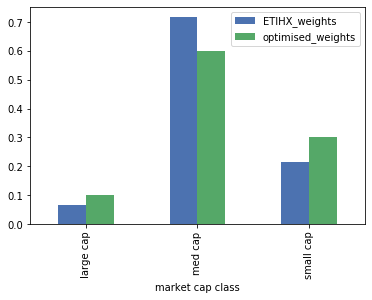

In [129]:
# 3. compare allocation by market cap weights
weights.name = 'optimised_weights'
best = holdings[['ticker', 'market cap ($B)']]
compare = best.merge(weights, how='left', left_on='ticker', right_index=True)
compare = compare.merge(fund_weights.rename("ETIHX_weights"), how='left', left_on='ticker', right_index=True)

# grp by market cap
compare['market cap class'] = compare['market cap ($B)'].apply(lambda x: 'small cap' if float(x) <= 2
                                                               else 'med cap' if float(x) <= 10 else 'large cap')

compare.groupby(by='market cap class').sum()[['ETIHX_weights', 'optimised_weights']].plot(kind='bar')

Based on the ETIHX fund weights, we observe that they are more overweight in medium cap (USD 2-10B) stocks than our optimal portfolio.

We choose to allocate a higher percentage of our portfolio to small cap stocks as we believe that there is more potential for growth in those classification of stocks. 